In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
data = datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
data.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [4]:
# labels
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

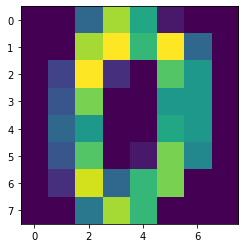

In [6]:
plt.subplot()
plt.imshow(data.images[0])

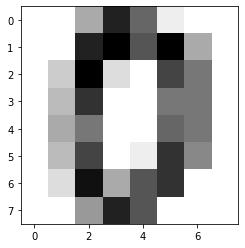

In [7]:
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

In [8]:
imagesAndLabels = list(zip(data.images, data.target))

In [9]:
imagesAndLabels[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

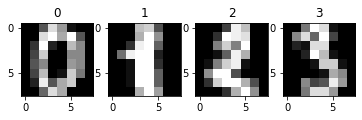

In [10]:
for i, (image, label) in enumerate(imagesAndLabels[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(label)

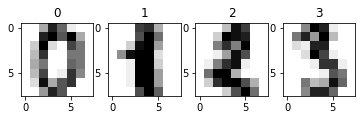

In [11]:
for i, (image, label) in enumerate(imagesAndLabels[:4]):
    plt.subplot(2, 4, i+1)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(label)

In [12]:
type(data.images)

numpy.ndarray

In [13]:
np.shape(data.images)

(1797, 8, 8)

In [14]:
# برای فلت کردن و یا همون تبدیل 8*8 به 64 از عدد منفی1 استفاده میکنیم
# len(data.images) = 1797
X = data.images.reshape((1797, -1))
np.shape(X)

(1797, 64)

In [15]:
y = data.target
len(y)

1797

In [18]:
# https://en.wikipedia.org/wiki/Support_vector_machine
# https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
SVC

sklearn.svm._classes.SVC

In [19]:
svmClassifier = SVC()

In [20]:
# X = images, y = labels or targets
# اینجا شروع به یادگیری میکنه و مدلی که یاد  میگیره رو میذاره توی اس وی ام کسلاسیفایر
svmClassifier.fit(X, y)

SVC()

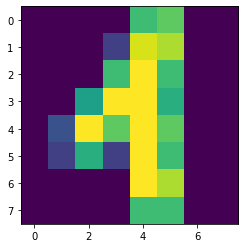

In [23]:
plt.subplot()
plt.imshow(data.images[200])

In [22]:
svmClassifier.predict([X[200], X[190]])

array([1, 3])

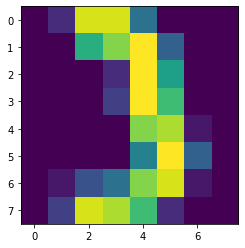

In [24]:
plt.subplot()
plt.imshow(data.images[190])

In [25]:
u = data.images[190]

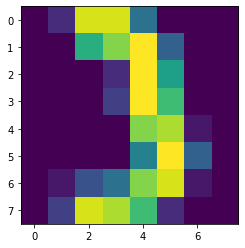

In [26]:
plt.subplot()
plt.imshow(u)

In [27]:
# matrice 8*8
u

array([[ 0.,  2., 15., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 16.,  5.,  0.],
       [ 0.,  1.,  4.,  6., 13., 15.,  1.,  0.],
       [ 0.,  3., 15., 14., 11.,  2.,  0.,  0.]])

In [28]:
u[0, 1] = 10
u[3, 2] = 16
u[6, 3] = 8
u[6, 1] = 0
u

array([[ 0., 10., 15., 15.,  6.,  0.,  0.,  0.],
       [ 0.,  0., 10., 13., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  9.,  0.,  0.],
       [ 0.,  0., 16.,  3., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13., 14.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  7., 16.,  5.,  0.],
       [ 0.,  0.,  4.,  8., 13., 15.,  1.,  0.],
       [ 0.,  3., 15., 14., 11.,  2.,  0.,  0.]])

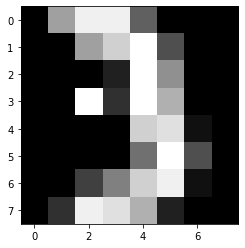

In [30]:
plt.subplot()
plt.imshow(u, cmap='gray')

In [31]:
# چون 8*8 بود تبدیل به فلت 64 تایی میکنیم و بعد پیش بینی میکنیم
u = u.reshape(-1)
svmClassifier.predict([u])

array([3])

In [32]:
# https://fr.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
# http://wiki.pathmind.com/accuracy-precision-recall-f1
# Evaluation Metrics for Machine Learning - Accuracy, Precision, Recall, and F1

In [34]:
svmNew = SVC()
svmNew.fit(X[:1000], y[:1000])

SVC()

In [35]:
svmNew.predict(X[1000:])

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3,
       7, 3, 3, 4, 6, 6, 6, 9, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6,
       3, 2, 1, 5, 4, 6, 3, 1, 7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6,
       9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0,
       8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 5,
       4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       8, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 9, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,

In [36]:
y[1000:]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3,
       7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6,
       3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6,
       9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0,
       8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8,
       4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,

In [39]:
#from sklearn import metrics
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# predict = الگوریتم پیش بینی کرده
p = svmNew.predict(X[1000:])
# expected = چیزی که ما میخواهیم بهش برسیم
e = y[1000:]
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(metrics.classification_report(e, p))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.97      0.96      0.97        80
           2       1.00      0.97      0.99        77
           3       0.97      0.85      0.91        79
           4       0.99      0.95      0.97        83
           5       0.92      0.99      0.95        82
           6       0.99      0.99      0.99        80
           7       0.94      0.99      0.96        80
           8       0.92      0.96      0.94        76
           9       0.92      0.95      0.93        81

    accuracy                           0.96       797
   macro avg       0.96      0.96      0.96       797
weighted avg       0.96      0.96      0.96       797



In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print(metrics.confusion_matrix(e, p))
# لیبل هامون رو میتونیم ببینیم که مثلا 78 مورد بوده که چک کرده و هر 78 عدد به ما صفر رو نشون داده یا
# سطر اول ستون پنجم فقط یک مورد بوده که ما به اشتباه گفتیم عدد 4 هست

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 77  0  0  0  0  0  0  1  2]
 [ 1  0 75  1  0  0  0  0  0  0]
 [ 0  0  0 67  0  3  0  4  5  0]
 [ 0  0  0  0 79  0  0  0  0  4]
 [ 0  0  0  0  0 81  1  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  1  0 79  0  0]
 [ 0  1  0  0  0  1  0  0 73  1]
 [ 0  0  0  1  0  2  0  1  0 77]]
